# Decision Trees, KNN, SVM, Random Forest Classifiers on Forest Cover Type

Each decision tree in the forest considers a random subset of features when forming questions and only has access to a random set of the training data points. This increases the diversity in the search for the right features to look for. The information gain of the features under consideration is high.

Decsion Trees using the Random Forest Approach for classification tasks can be accounted as the **majority voting** process. Here the choice selected by majority of the trees is given more preference.

**KEY IDEAS**

- Iteratively split variables into grops
- Evaluate "homogeniety" within each group
- Split again if need be

**PROS**
- Easy to interpret when trees are small
- Better performance in non-linear settings(OUR CASE)

**CONS**
- Without pruning/ cross-validation it can lead to overfitting
- Harder to estimate uncertainity
- Large Trees can take long time to train
- Results can vary during trials

### Basic Algorithm
- Start with all data in one group
- Find the **best variable** that best splits the current group
- Divide the data into (2 groups) can be predictions(leaves) on that split("node")
- Within each split, find the best $D_l$, $D_r$, and the feature to split on
- Continue unitel the groups are sufficiently "pure"

### Measures of IMPURITY
- Misclassification Error(M_ce):

    $p_{mk} = \frac{1}{N_{m}}\sum I(y_i = k)$<br>
    $M_{ce} = 1 - p_{mk}$
    
0: Perfect Purity; 0.5: No homogeniety

- Gini Index:

    $\sum p_{mk}xp_{mk'} = 1 - \sum p^2_{mk}$
    
0: Perfect Purity; 0.5: No homogeniety

- Deviance/ Information Gain:

    $-\sum p_{mk} \log_2 p_{mk}$
    
0: Perfect Purity; 1: No homogeniety

### GRADIENT BOOSTING

This is a type of Ensemble Learning and it is a twist to the Random Forest approach. Instead of combining the predictions from all the trees to get the best answer, Gradient Boosting relies on an architecture where the output from one tree is fed as an input to another tree. 

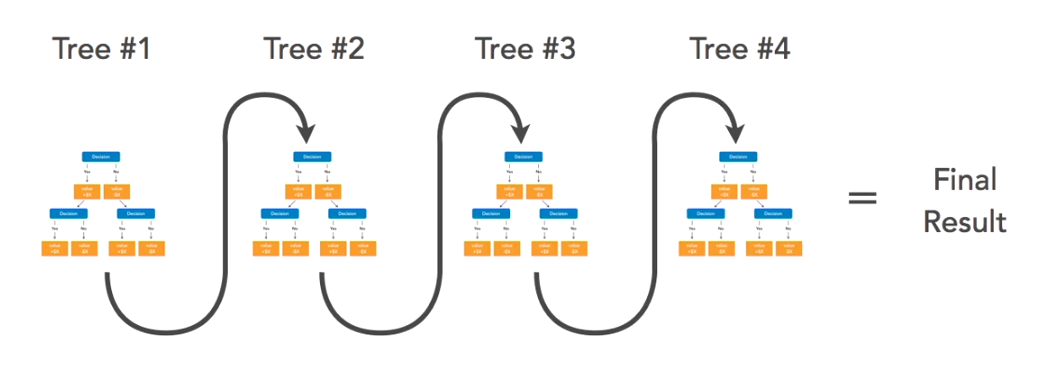

This is one such example. The goal of each tree is to **fix the errors** which the previous trees were wrong about. This makes Gradient boosting an efficient algorithm to model complex structure in a dataset.

**How large the dataset should be for training?**
It should be large enough to capture some insights from the feature. We should have as a starting point **10x** the number of data points in the dataset as the number of features in the model. So, if we have 18 features then we need 180 datapoints to work with.

**What is Feature Engineering?**
It is the process of selecting the features from the given dataset or creating new features from the dataset using our knowledge to make a more robust machine learning algorithm with good accuracy.

**Some approaches to feature Engineering**

- **Add or drop features**: Choose the feature that has high correlation with the output
- **Combining Multiple Features**: This is done to represent the data in the most simplest way possible
- **Binning**: Replace an exact numerical measurement with a more broad cateogry.
- **One Hot Encoding**: 

**Curse of Dimensionality**
This states that as the number of dimensions(or features) in the datset increases the number of datapoints required to build a good model increases exponentially. Include only the features that are **more predictive** in nature and not the onle that is **less predictive**.

**Simple way to test Overfitting**
When the accuracy of the Training dataset is **larger** than the accuracy of the validatioin dataset.

**Simple way to test Underfitting**
When the accuracy of the Training dataset and the accuracy of the validation dataset are both **low**.

**GOOD FIT**: Both the accuracies are high!

### Simple Illustration of Impurity - TBD

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
cover = pd.read_csv('train_cleaned.csv')
cover.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 53 columns]

In [2]:
print(cover.shape)

(15120, 53)


In [3]:
print(cover.groupby('Cover_Type').size())

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64


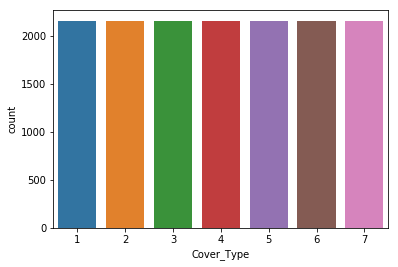

In [4]:
import seaborn as sns
sns.countplot(cover['Cover_Type'], label="Count")
plt.show()

### Box Plot

This is to find the type of distribution in the feature that are present in the class.

In [ ]:
print("\t\t\t\tBOX PLOT")
cover.drop(cover.columns[10:53], axis=1).plot(kind='box', subplots=True,layout = (7,2), sharex=False, sharey=False,\
                                      figsize=(30,180))
_ = plt.savefig('Cover_boxplot')
_ = plt.show()

OBSERVATION: 

**Horizontal Distance to Fire points**, **Elevation** & **Horizontal Distance to Roadways** seem to follow a Gaussian Distribution**

### HISTOGRAM PLOT
This is used to see the distribution of the variables in a histogram!

In [ ]:
import pylab as pl
cover.drop(cover.columns[10:53], axis=1).plot(kind='hist', bins=100, subplots=True,layout = (7,2), sharex=False, sharey=False,\
                                      figsize=(40,120))
_ = plt.savefig('Cover_Histogramplot')
_ = plt.show()

OBSERVATION:

**Horizontal Distance to Fire points**, **Elevation** & **Horizontal Distance to Roadways** seem to follow a near Gaussian as predicted 

### SCATTER MATRIX

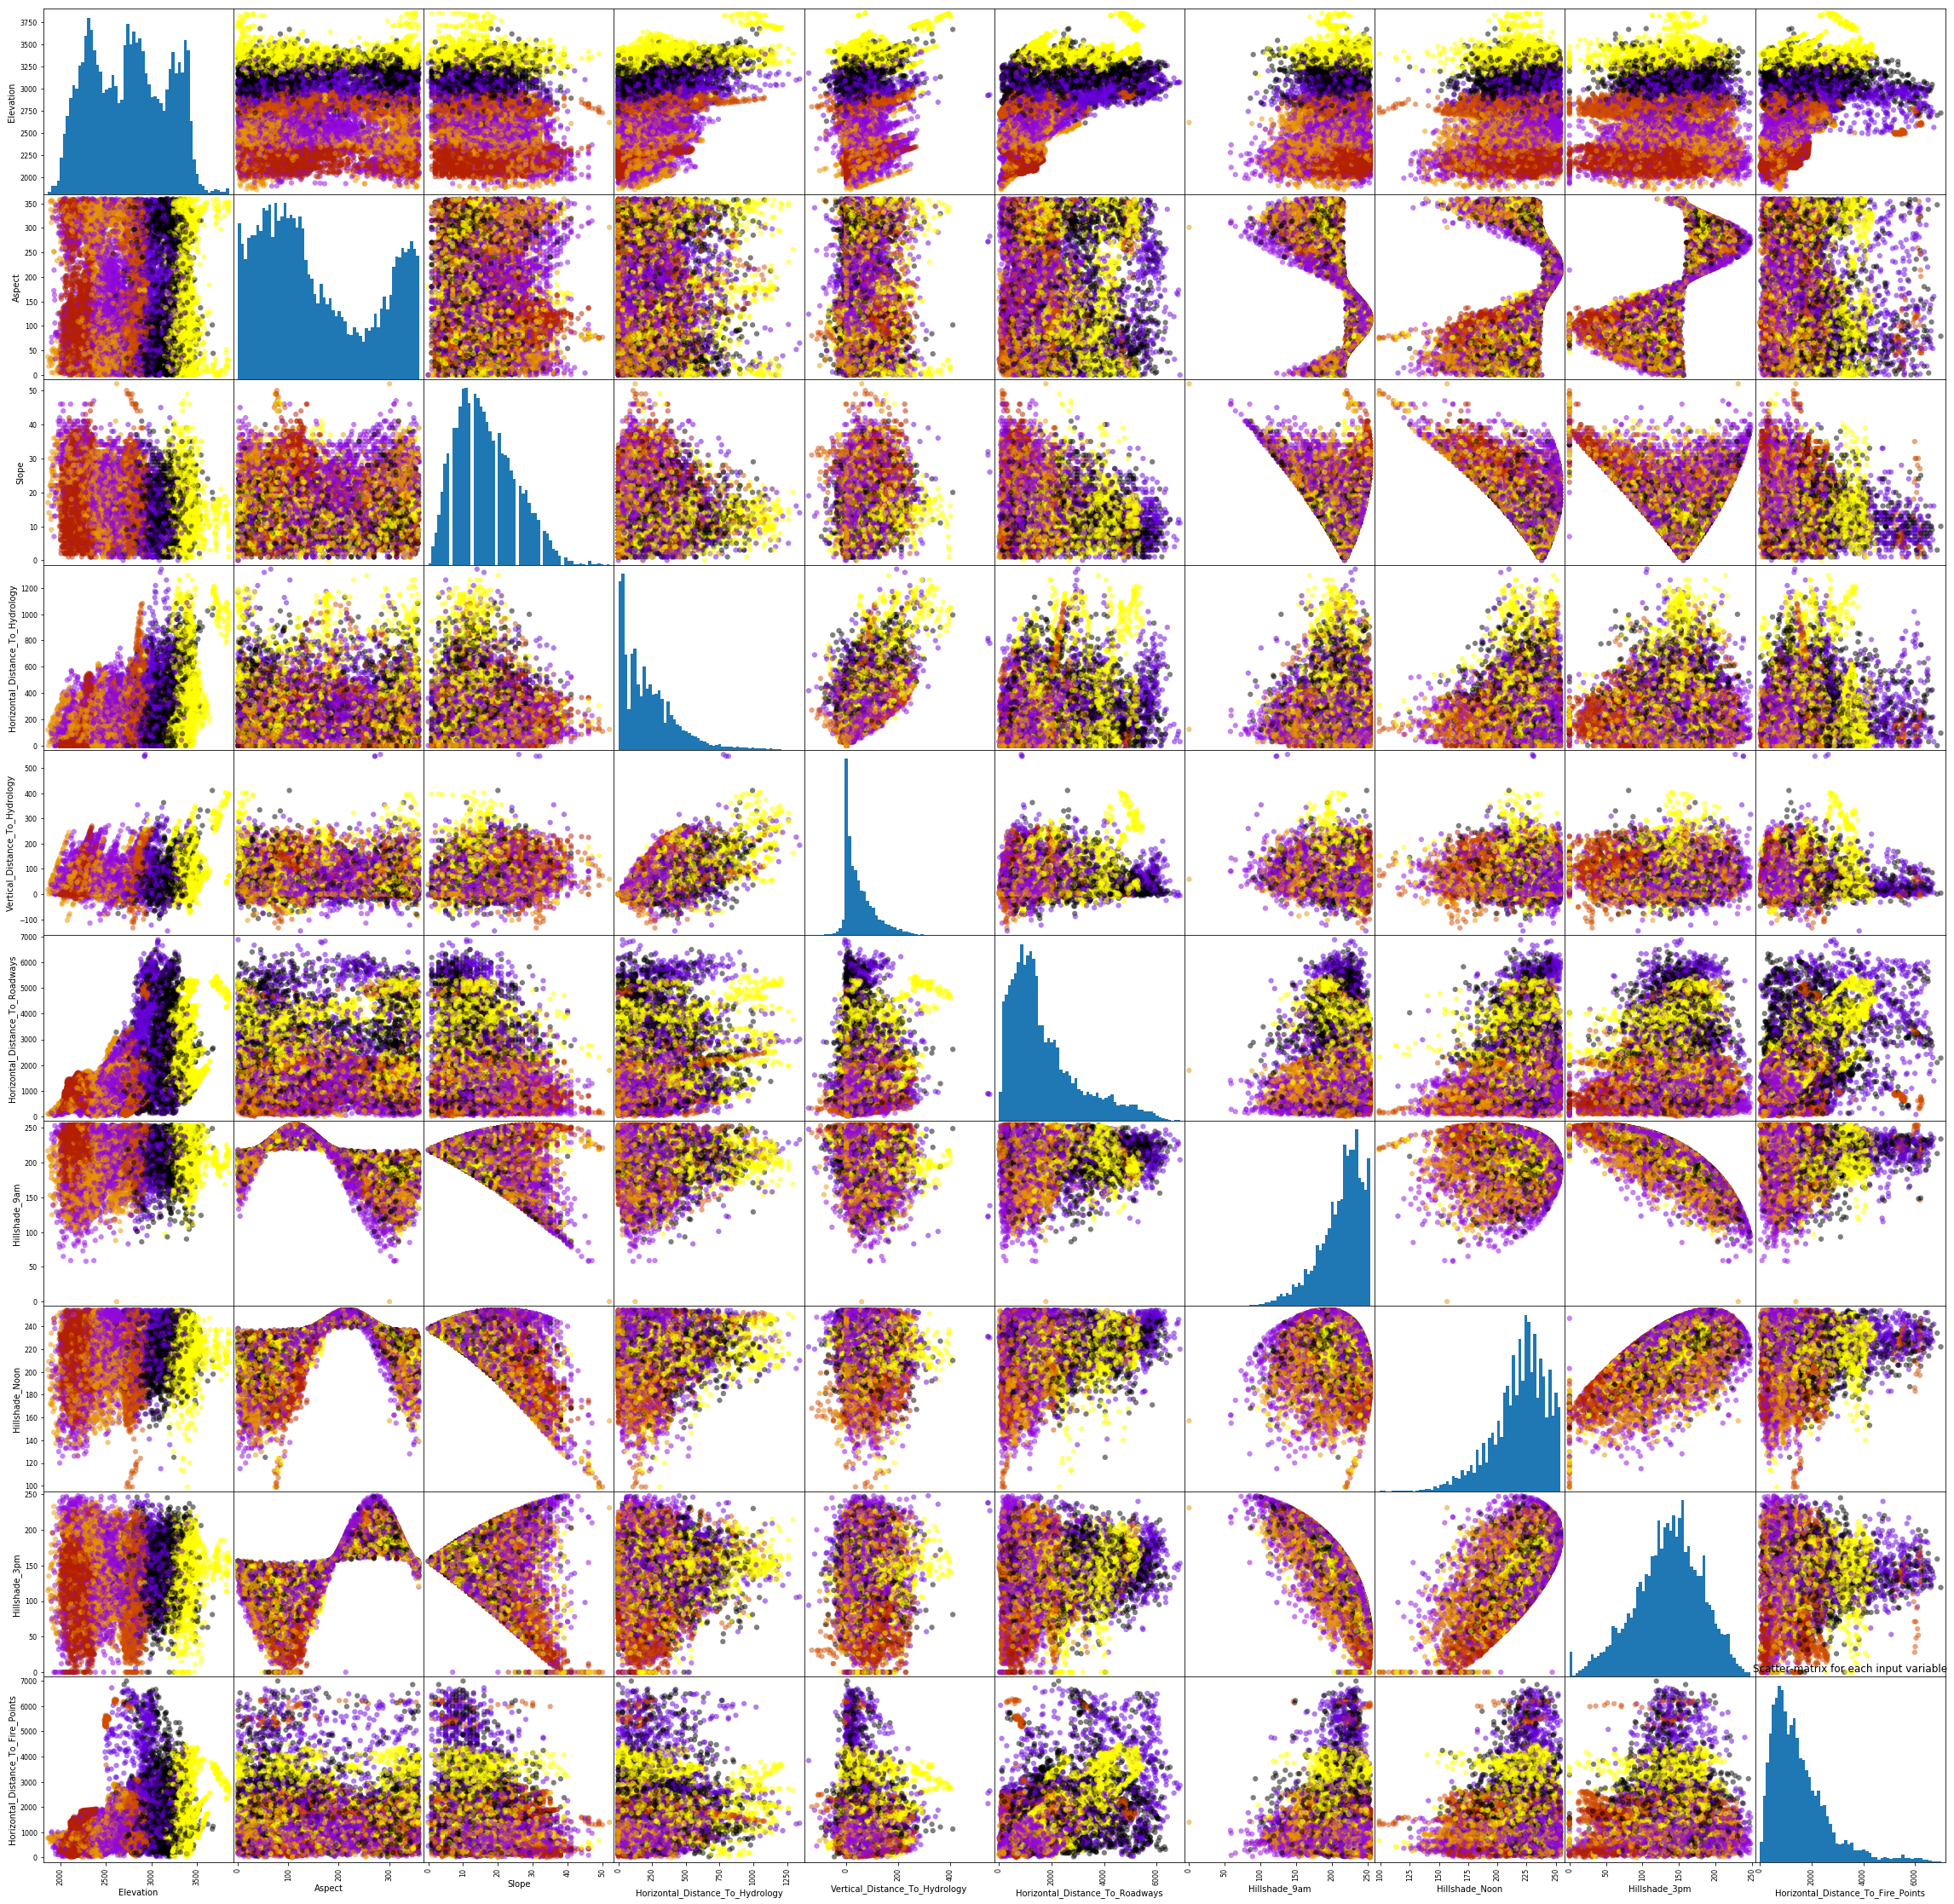

In [5]:
import pandas
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = list(cover)[0:10]
X = cover[feature_names]
y = cover['Cover_Type']

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':60}, figsize=(40,40), cmap = cmap)
plt.title('Scatter-matrix for each input variable')
plt.savefig('Cover_scatter_matrix')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.exceptions import DataConversionWarning
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


dataset = pd.read_csv('train_cleaned.csv')


dataset['Cover_Type'] = pd.Categorical(dataset['Cover_Type'])
dataset_dummy = pd.get_dummies(dataset['Cover_Type'], prefix = 'category')

df_ohc = pd.get_dummies(dataset['Cover_Type'], prefix = 'Cover')

df = pd.concat([dataset.drop(['Cover_Type'], axis = 1), df_ohc], axis=1)

X = df.values[:,:52].astype(np.float64)
y = df.values[:,52:].astype(np.float64)

### DECISION TREE CLASSIFIER

In [7]:
from sklearn.tree import DecisionTreeClassifier

# X = np.array(dataset.iloc[:,:-1])
# y = np.array(dataset.iloc[:,-1])

scaler = [ 0,StandardScaler(), Normalizer(), MinMaxScaler()]
names = ['No Scaling used','Standard Scaler','Normalizer','Minmax']

print('Start!')
print('-------------------------------------------------')
for sc, name in zip(scaler,names):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=42)
    
    if sc!=0:
        X_train = sc.fit_transform(X_train)
        X_val = sc.transform(X_val)

    dtc = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1)
    _ = dtc.fit(X_train, y_train)

# svm = SVC(C=0.1, kernel='poly', degree=15, gamma=0.5\
#           , coef0=0.0, shrinking=True, probability=False\
#           , tol=0.001, cache_size=200, class_weight=None\
#           , verbose=False, max_iter=-1\
#           , decision_function_shape='ovr', random_state=None)
    if sc!=0:
        print('Scaler used: ', name)
    else:
        print(name)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
         .format(dtc.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on Validation set: {:.2f}'
         .format(dtc.score(X_val, y_val)))
    print('-------------------------------------------------')
print('Done!')

Start!
-------------------------------------------------
No Scaling used
Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on Validation set: 0.78
-------------------------------------------------
Scaler used:  Standard Scaler
Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on Validation set: 0.78
-------------------------------------------------
Scaler used:  Normalizer
Accuracy of Decision Tree classifier on training set: 0.90
Accuracy of Decision Tree classifier on Validation set: 0.74
-------------------------------------------------
Scaler used:  Minmax
Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on Validation set: 0.78
-------------------------------------------------
Done!


### KNN CLASSIFIER

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# X = np.array(dataset.iloc[:,:-1])
# y = np.array(dataset.iloc[:,-1])

scaler = [ 0,StandardScaler(), Normalizer(), MinMaxScaler()]
names = ['No Scaling used','Standard Scaler','Normalizer','Minmax']
print('Start!')
print('-------------------------------------------------')
for sc, name in zip(scaler,names):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=42)
    
    if sc!=0:
        X_train = sc.fit_transform(X_train)
        X_val = sc.transform(X_val)

    knn = KNeighborsClassifier(n_neighbors=1, leaf_size=50)
    _ = knn.fit(X_train, y_train)


# svm = SVC(C=0.1, kernel='poly', degree=15, gamma=0.5\
#           , coef0=0.0, shrinking=True, probability=False\
#           , tol=0.001, cache_size=200, class_weight=None\
#           , verbose=False, max_iter=-1\
#           , decision_function_shape='ovr', random_state=None)
    if sc!=0:
        print('Scaler used: ', name)
    else:
        print(name)
    print('Accuracy of KNN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on Validation set: {:.2f}'
         .format(knn.score(X_val, y_val)))
    print('-------------------------------------------------')
print('Done!')

Start!
-------------------------------------------------
No Scaling used
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on Validation set: 0.85
-------------------------------------------------
Scaler used:  Standard Scaler
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on Validation set: 0.81
-------------------------------------------------
Scaler used:  Normalizer
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on Validation set: 0.76
-------------------------------------------------
Scaler used:  Minmax
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on Validation set: 0.82
-------------------------------------------------
Done!


### SUPPORT VECTOR MACHINE

In [12]:
from sklearn.svm import NuSVC

X = np.array(dataset.iloc[:,:-1])
y = np.array(dataset.iloc[:,-1])

scaler = [ 0,StandardScaler(), Normalizer(), MinMaxScaler()]
names = ['No Scaling used','Standard Scaler','Normalizer','Minmax']
print('Start!')
print('-------------------------------------------------')
for sc, name in zip(scaler,names):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=42)
    
    if sc!=0:
        X_train = sc.fit_transform(X_train)
        X_val = sc.transform(X_val)

    svm = NuSVC(nu=0.14285714285,gamma='scale',kernel='rbf')
    _ = svm.fit(X_train, y_train)

# svm = SVC(C=0.1, kernel='poly', degree=15, gamma=0.5\
#           , coef0=0.0, shrinking=True, probability=False\
#           , tol=0.001, cache_size=200, class_weight=None\
#           , verbose=False, max_iter=-1\
#           , decision_function_shape='ovr', random_state=None)
    if sc!=0:
        print('Scaler used: ', name)
    else:
        print(name)
    print('Accuracy of SVM classifier on training set: {:.2f}'
         .format(svm.score(X_train, y_train)))
    print('Accuracy of SVM classifier on Validation set: {:.2f}'
         .format(svm.score(X_val, y_val)))
    print('-------------------------------------------------')
print('Done!')

Start!
-------------------------------------------------
No Scaling used
Accuracy of SVM classifier on training set: 0.64
Accuracy of SVM classifier on Validation set: 0.63
-------------------------------------------------
Scaler used:  Standard Scaler
Accuracy of SVM classifier on training set: 0.88
Accuracy of SVM classifier on Validation set: 0.79
-------------------------------------------------
Scaler used:  Normalizer
Accuracy of SVM classifier on training set: 0.55
Accuracy of SVM classifier on Validation set: 0.55
-------------------------------------------------
Scaler used:  Minmax
Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on Validation set: 0.77
-------------------------------------------------
Done!


### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

X = np.array(dataset.iloc[:,:-1])
y = np.array(dataset.iloc[:,-1])

scaler = [ 0,StandardScaler(), Normalizer(), MinMaxScaler()]
names = ['No Scaling used','Standard Scaler','Normalizer','Minmax']
print('Start!')
print('-------------------------------------------------')
for sc, name in zip(scaler,names):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=42, shuffle= True)
    
    if sc!=0:
        X_train = sc.fit_transform(X_train)
        X_val = sc.transform(X_val)

    rfc = RandomForestClassifier(n_estimators=500)
    _ = rfc.fit(X_train, y_train)

# svm = SVC(C=0.1, kernel='poly', degree=15, gamma=0.5\
#           , coef0=0.0, shrinking=True, probability=False\
#           , tol=0.001, cache_size=200, class_weight=None\
#           , verbose=False, max_iter=-1\
#           , decision_function_shape='ovr', random_state=None)
    if sc!=0:
        print('Scaler used: ', name)
    else:
        print(name)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'
         .format(rfc.score(X_train, y_train)))
    print('Accuracy of Random Forest on Validation set: {:.2f}'
         .format(rfc.score(X_val, y_val)))
    print('-------------------------------------------------')
print('Done!')

Start!
-------------------------------------------------
No Scaling used
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest on Validation set: 0.87
-------------------------------------------------
Scaler used:  Standard Scaler
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest on Validation set: 0.87
-------------------------------------------------
Scaler used:  Normalizer
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest on Validation set: 0.87
-------------------------------------------------
Scaler used:  Minmax
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest on Validation set: 0.87
-------------------------------------------------
Done!


In [31]:
cover_test = pd.read_csv('test.csv')
cover_test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type31  \
0            196             214            156  ...            0   
1            201             216            152  ...            0   
2            206             208            137  ...            0   
3            208             201            125  ...            0   
4            210             195            115  ...            0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0            0  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 55 columns]

In [43]:
feature_names = list(cover_test)[:]

X_test = cover_test[feature_names]

X_test = X_test.drop(["Id","Soil_Type31","Soil_Type37"], axis = 1)
X_test.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2680     354     14                                 0   
1       2683       0     13                                 0   
2       2713      16     15                                 0   
3       2709      24     17                                 0   
4       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type29  Soil_Type30  \
0                                6645  ...            1            0   
1                                6675  ...            1            0   
2                                6344  ...            1            0   
3                                6374  ...            1            0   
4                                6404  ...            1            0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 52 columns]

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
X = np.array(dataset.iloc[:,:-1])
y = np.array(dataset.iloc[:,-1])

X.shape

rfc = ExtraTreesClassifier(max_features=0.3, n_estimators=500)
_ = rfc.fit(X, y)


y_predict = rfc.predict(X_test)

y_predict

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [47]:
feature_names = list(cover_test)[0:53]

X_test = cover_test[feature_names]
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'Id':X_test['Id'],'Cover_type':y_predict})

#Visualize the first 5 rows
submission.head()

Id  Cover_type
0  15121           2
1  15122           2
2  15123           2
3  15124           2
4  15125           2

In [48]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'ForestCoverType_Sub.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Forest_CoverType_Sub3.csv


In [49]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 2 columns):
Id            565892 non-null int64
Cover_type    565892 non-null int64
dtypes: int64(2)
memory usage: 8.6 MB
